In [2]:
import os, sys
sys.path.append('../CommonUtils/')
import CommonUtils as cu

import argparse, math
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# np.set_printoptions(precision=15)

In [3]:
dataPY=np.load("../DATA/misc/PyEDMBlind.npy")
print(dataPY)

[3.21583139 4.65194631 3.33209    ... 2.55086774 2.88411268 3.63855854]


In [4]:
dataC=np.loadtxt("../DATA/misc/CEDMBlind.txt")
print(dataC)

[3.21583139 4.65194631 3.33209    ... 2.55086774 2.88411268 3.63855854]


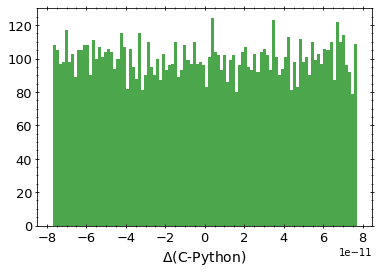

In [5]:
diff=dataC-dataPY
ax,legend =cu.plotHist(diff)
ax.set_xlabel(xlabel=r"$\Delta$(C-Python)")
plt.savefig("dif.png", dpi=300)

In [6]:
# Load X vs Y data
dataXY=np.load("../DATA/misc/dataXY.npy")
x=dataXY[0]
y=dataXY[1]
# binsX=binsXY[0]
# binsY=binsXY[1]
font_size=14

NameError: name 'binsX' is not defined

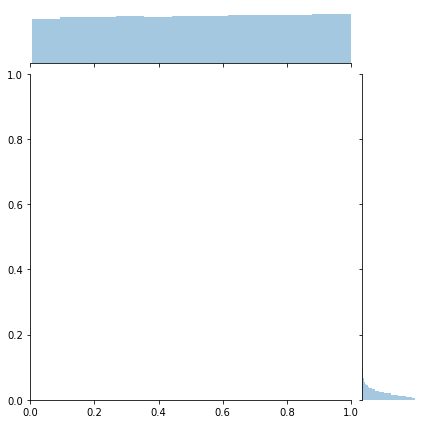

In [7]:
# the return in JointGrid (not axes)
# fig : jg.fig, axes : jg.ax_joint
jg = sns.jointplot(x=x, y=y)
jg.ax_joint.cla() # clear 
plt.sca(jg.ax_joint) # join 
plt.hist2d(x, y, bins=(binsX, binsY), cmap=cmap) #add 2D histo on top

#add color bar with separate axis 
cbar_ax = jg.fig.add_axes([1, 0.1, .03, .7])
cb = plt.colorbar(cax=cbar_ax)
cb.set_label("Frequency", fontsize=font_size)
cb.ax.tick_params(labelsize=font_size-1)

#Make pretty plot as default
jg.ax_joint.tick_params(labelsize=font_size-1)
jg.ax_joint.set_ylabel("Y",fontsize=font_size)
jg.ax_joint.set_xlabel("X",fontsize=font_size)
jg.ax_joint.tick_params(axis='x', which='both', bottom=True, top=False, direction='inout')
jg.ax_joint.tick_params(axis='y', which='both', left=True, right=False, direction='inout')
jg.ax_joint.minorticks_on()

#make space for the colour bar
jg.fig.tight_layout(rect=[0.2, 0.1, 0.1, 0.1]) 

plt.show()

In [ ]:
# x_estimator is np.mean when bins are used
# x_ci: "ci" for mean, "sd" for sd
# fit_reg: True for a a regression mode
# ci : 95 = 95% CL 
# n_boot default none=optional, n iterations
x_bins=10
fit_bool=False
ax=sns.regplot(x=x, y=y, x_estimator=np.mean, x_bins=x_bins, fit_reg=fit_bool, ci=95, marker="o", color="green")
#plt.savefig("CL.png")